In [ ]:
#IMPORT PACKAGES
from fbprophet import Prophet
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import itertools
import scipy
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#IMPORT NET SALES DATASET
net_income=pd.read_excel("Regression_datasheet.xlsx")

In [ ]:
#net_income=net_income.fillna(net_income.median())
net_income=net_income.iloc[:26,:]
net_income.shape
net_income1 = net_income.dropna()
net_income1.shape

(26, 22)

(19, 22)

In [ ]:
net_income1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 6 to 25
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   datestamp                       19 non-null     datetime64[ns]
 1   Product_sales                   19 non-null     float64       
 2   Service_sales                   19 non-null     float64       
 3      Total_net_sales              19 non-null     float64       
 4   Product_cost                    19 non-null     float64       
 5   Service_cost                    19 non-null     float64       
 6      Total_cost_sales             19 non-null     float64       
 7   GROSS_MARGIN                    19 non-null     float64       
 8   Research_development            19 non-null     float64       
 9   Sales_marketing                 19 non-null     float64       
 10  General_administrative          19 non-null     float64       
 11  Amortiza

In [ ]:
net_income1.tail()

,datestamp,Product_sales,Service_sales,Total_net_sales,Product_cost,Service_cost,Total_cost_sales,GROSS_MARGIN,Research_development,Sales_marketing,General_administrative,Amortization_intangible_assets,Restructuring_charges,Total_operating_expenses,OPERATING_INCOME,Interest_income,Interest_expense,Other income,net_other_income,INCOME_BEFORE_TAXES,income_taxes,NET_INCOME
21,2015-01-24,9078.0,2858.0,11936.0,3806.0,1040.0,4846.0,7090.0,1529.0,2308.0,490.0,72.0,69.0,4468.0,2622.0,189,-139,201,251,2873,476,2397
22,2015-04-25,9326.0,2811.0,12137.0,3584.0,1028.0,4612.0,7525.0,1547.0,2449.0,510.0,70.0,24.0,4600.0,2925.0,190,-139,59,110,3035,598,2437
23,2015-07-25,9911.0,2932.0,12843.0,4068.0,1042.0,5110.0,7733.0,1548.0,2549.0,536.0,146.0,73.0,4852.0,2881.0,211,-149,-10,52,2933,614,2319
24,2015-10-24,9844.0,2838.0,12682.0,3853.0,997.0,4850.0,7832.0,1560.0,2443.0,539.0,69.0,142.0,4753.0,3079.0,225,-159,-8,58,3137,707,2430
25,2016-01-23,8983.0,2944.0,11927.0,3480.0,1015.0,4495.0,7432.0,1509.0,2286.0,176.0,71.0,96.0,4138.0,3294.0,237,-162,-63,12,3306,159,3147


In [ ]:
net_income1.columns = net_income1.columns.str.strip()
for x in net_income1.columns:  
  if net_income1[x].dtype=='object':
      net_income1[x]=pd.to_numeric(net_income1[x],errors='coerce')

In [ ]:
net_income1.shape
net_income1.info()
net_income1.tail()

(19, 22)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 6 to 25
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   datestamp                       19 non-null     datetime64[ns]
 1   Product_sales                   19 non-null     float64       
 2   Service_sales                   19 non-null     float64       
 3   Total_net_sales                 19 non-null     float64       
 4   Product_cost                    19 non-null     float64       
 5   Service_cost                    19 non-null     float64       
 6   Total_cost_sales                19 non-null     float64       
 7   GROSS_MARGIN                    19 non-null     float64       
 8   Research_development            19 non-null     float64       
 9   Sales_marketing                 19 non-null     float64       
 10  General_administrative          19 non-null     float64       
 11  Amortiza

,datestamp,Product_sales,Service_sales,Total_net_sales,Product_cost,Service_cost,Total_cost_sales,GROSS_MARGIN,Research_development,Sales_marketing,General_administrative,Amortization_intangible_assets,Restructuring_charges,Total_operating_expenses,OPERATING_INCOME,Interest_income,Interest_expense,Other income,net_other_income,INCOME_BEFORE_TAXES,income_taxes,NET_INCOME
21,2015-01-24,9078.0,2858.0,11936.0,3806.0,1040.0,4846.0,7090.0,1529.0,2308.0,490.0,72.0,69.0,4468.0,2622.0,189,-139,201,251,2873,476,2397
22,2015-04-25,9326.0,2811.0,12137.0,3584.0,1028.0,4612.0,7525.0,1547.0,2449.0,510.0,70.0,24.0,4600.0,2925.0,190,-139,59,110,3035,598,2437
23,2015-07-25,9911.0,2932.0,12843.0,4068.0,1042.0,5110.0,7733.0,1548.0,2549.0,536.0,146.0,73.0,4852.0,2881.0,211,-149,-10,52,2933,614,2319
24,2015-10-24,9844.0,2838.0,12682.0,3853.0,997.0,4850.0,7832.0,1560.0,2443.0,539.0,69.0,142.0,4753.0,3079.0,225,-159,-8,58,3137,707,2430
25,2016-01-23,8983.0,2944.0,11927.0,3480.0,1015.0,4495.0,7432.0,1509.0,2286.0,176.0,71.0,96.0,4138.0,3294.0,237,-162,-63,12,3306,159,3147


In [ ]:
#create features and labels
x=net_income1.drop(['datestamp','NET_INCOME'],axis=1)
y=net_income1['NET_INCOME']
x.head()
y.head()

,Product_sales,Service_sales,Total_net_sales,Product_cost,Service_cost,Total_cost_sales,GROSS_MARGIN,Research_development,Sales_marketing,General_administrative,Amortization_intangible_assets,Restructuring_charges,Total_operating_expenses,OPERATING_INCOME,Interest_income,Interest_expense,Other income,net_other_income,INCOME_BEFORE_TAXES,income_taxes
6,8669.0,2197.0,10866.0,3437.0,770.0,4207.0,6659.0,1430.0,2446.0,466.0,103.0,31.0,4476.0,2183.0,161,-153,12,20,2203,396
7,8921.0,2274.0,11195.0,3579.0,755.0,4334.0,6861.0,1484.0,2520.0,532.0,101.0,768.0,5405.0,1456.0,164,-148,-5,11,1467,235
8,8952.0,2304.0,11256.0,3563.0,803.0,4366.0,6890.0,1375.0,2452.0,552.0,99.0,202.0,4680.0,2210.0,164,-148,19,35,2245,468
9,9118.0,2409.0,11527.0,3650.0,812.0,4462.0,7065.0,1339.0,2395.0,497.0,97.0,3.0,4331.0,2734.0,158,-150,7,15,2749,567
10,9106.0,2482.0,11588.0,3563.0,856.0,4419.0,7169.0,1358.0,2383.0,562.0,96.0,20.0,4419.0,2750.0,161,-151,19,29,2779,614


6     1807
7     1232
8     1777
9     2182
10    2165
Name: NET_INCOME, dtype: int64

In [ ]:
x.shape
y.shape

(19, 20)

(19,)

In [ ]:
from sklearn.preprocessing import scale
x_scaled=scale(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()
x_scaled.describe()

,Product_sales,Service_sales,Total_net_sales,Product_cost,Service_cost,Total_cost_sales,GROSS_MARGIN,Research_development,Sales_marketing,General_administrative,Amortization_intangible_assets,Restructuring_charges,Total_operating_expenses,OPERATING_INCOME,Interest_income,Interest_expense,Other income,net_other_income,INCOME_BEFORE_TAXES,income_taxes
0,-1.462707,-2.049663,-1.932955,-1.467140,-1.663471,-1.781549,-1.283115,-0.684919,0.450742,-0.454176,0.642154,-0.537873,-0.546080,-0.845170,-0.749436,-0.948938,-0.141931,-0.511518,-0.906005,-0.187664
1,-0.779244,-1.697832,-1.289220,-0.802542,-1.832849,-1.290529,-0.791393,-0.112199,1.456684,0.232841,0.550761,3.744015,2.757162,-2.490136,-0.616358,-0.191382,-0.447557,-0.659772,-2.554187,-0.891175
2,-0.695168,-1.560755,-1.169865,-0.877426,-1.290839,-1.166808,-0.720799,-1.268245,0.532305,0.441028,0.459368,0.455618,0.179282,-0.784077,-0.616358,-0.191382,-0.016086,-0.264429,-0.811951,0.126949
3,-0.244950,-1.080985,-0.639616,-0.470243,-1.189213,-0.795643,-0.294802,-1.650058,-0.242542,-0.131486,0.367976,-0.700550,-1.061656,0.401566,-0.882513,-0.494405,-0.231821,-0.593881,0.316695,0.559543
4,-0.277496,-0.747431,-0.520260,-0.877426,-0.692370,-0.961894,-0.041639,-1.448545,-0.405668,0.545121,0.322279,-0.601782,-0.748755,0.437769,-0.749436,-0.645916,-0.016086,-0.363265,0.383876,0.764916


,Product_sales,Service_sales,Total_net_sales,Product_cost,Service_cost,Total_cost_sales,GROSS_MARGIN,Research_development,Sales_marketing,General_administrative,Amortization_intangible_assets,Restructuring_charges,Total_operating_expenses,OPERATING_INCOME,Interest_income,Interest_expense,Other income,net_other_income,INCOME_BEFORE_TAXES,income_taxes
count,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,19.000000,1.900000e+01,1.900000e+01
mean,-2.337312e-15,-1.086850e-15,4.981395e-16,3.856564e-16,5.025220e-16,-1.192029e-15,-7.245666e-16,1.738376e-16,-3.038505e-16,-1.402387e-16,1.051790e-16,-7.304099e-18,8.648053e-16,-1.869849e-16,9.349247e-17,-1.145283e-15,2.337312e-17,0.000000,-5.025220e-16,-1.168656e-16
std,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402,1.027402e+00,1.027402e+00
min,-2.129897e+00,-2.049663e+00,-1.932955e+00,-1.467140e+00,-1.832849e+00,-1.781549e+00,-3.006575e+00,-1.650058e+00,-1.846611e+00,-3.472886e+00,-1.094307e+00,-7.005504e-01,-1.747905e+00,-2.490136e+00,-8.825130e-01,-2.312538e+00,-1.490279e+00,-1.170423,-2.554187e+00,-3.504216e+00
25%,-6.531294e-01,-6.149229e-01,-6.220057e-01,-7.908416e-01,-5.794514e-01,-7.318494e-01,-3.666133e-01,-7.591605e-01,-4.600431e-01,-1.679192e-01,-8.201287e-01,-5.523982e-01,-5.816371e-01,-4.525950e-01,-7.272561e-01,-4.186491e-01,-5.734026e-01,-0.618590,-5.253108e-01,-4.565117e-02
50%,-1.581614e-01,1.938318e-01,1.430407e-01,-1.625776e-02,6.418539e-02,-1.190413e-01,1.287599e-01,1.529485e-01,4.292781e-02,5.588175e-02,2.405069e-03,-2.938581e-01,-1.478421e-01,2.137635e-01,-3.945627e-01,-3.987134e-02,-2.318212e-01,-0.363265,3.166951e-01,1.619064e-01
75%,6.175145e-01,7.878324e-01,6.312226e-01,4.892108e-01,8.772003e-01,6.967475e-01,5.681450e-01,6.302149e-01,5.119142e-01,3.733668e-01,5.050646e-01,-2.660318e-02,3.872902e-01,6.300961e-01,3.595423e-01,8.691953e-01,6.401103e-01,0.583911,6.615592e-01,5.092922e-01
max,1.905787e+00,1.363556e+00,1.935324e+00,2.679575e+00,1.407918e+00,2.073149e+00,1.572280e+00,2.433221e+00,1.850904e+00,2.096113e+00,2.607095e+00,3.744015e+00,2.757162e+00,1.668665e+00,2.621857e+00,1.626751e+00,3.255905e+00,3.293658,1.564028e+00,1.171292e+00


In [ ]:
correlation=x_scaled.corr()
correlation

,Product_sales,Service_sales,Total_net_sales,Product_cost,Service_cost,Total_cost_sales,GROSS_MARGIN,Research_development,Sales_marketing,General_administrative,Amortization_intangible_assets,Restructuring_charges,Total_operating_expenses,OPERATING_INCOME,Interest_income,Interest_expense,Other income,net_other_income,INCOME_BEFORE_TAXES,income_taxes
Product_sales,1.000000,0.479327,0.926692,0.250399,0.546151,0.393851,0.904929,0.473309,0.513498,0.294796,0.205702,-0.071831,0.365738,0.608403,0.378679,-0.107198,-0.234103,-0.085535,0.590510,0.249260
Service_sales,0.479327,1.000000,0.774023,0.502682,0.959955,0.743944,0.494571,0.596502,-0.194965,-0.331667,-0.324541,-0.283654,-0.163160,0.563536,0.710965,0.148008,0.156916,0.423883,0.615358,0.089251
Total_net_sales,0.926692,0.774023,1.000000,0.395905,0.805084,0.602709,0.864632,0.596896,0.286967,0.070649,0.009425,-0.173287,0.193987,0.680241,0.577642,-0.013956,-0.101695,0.119808,0.689523,0.218044
Product_cost,0.250399,0.502682,0.395905,1.000000,0.354161,0.947349,-0.103914,0.197362,0.000192,0.181411,0.005296,-0.088910,0.074183,-0.143796,0.095916,0.494685,0.130446,0.208925,-0.113913,0.015300
Service_cost,0.546151,0.959955,0.805084,0.354161,1.000000,0.634963,0.601829,0.627745,-0.085750,-0.272001,-0.303778,-0.303077,-0.114009,0.631957,0.721784,0.142218,0.235332,0.499122,0.693303,0.207824
Total_cost_sales,0.393851,0.743944,0.602709,0.947349,0.634963,1.000000,0.120222,0.377976,-0.029202,0.056728,-0.099638,-0.177220,0.022245,0.097592,0.326371,0.457347,0.188336,0.343487,0.143283,0.083797
GROSS_MARGIN,0.904929,0.494571,0.864632,-0.103914,0.601829,0.120222,1.000000,0.504623,0.375403,0.052178,0.074459,-0.104008,0.227335,0.784846,0.513160,-0.305314,-0.245099,-0.067210,0.767627,0.218510
Research_development,0.473309,0.596502,0.596896,0.197362,0.627745,0.377976,0.504623,1.000000,0.183153,-0.169186,-0.432805,0.188567,0.407098,0.209995,0.388711,0.274284,0.214308,0.370531,0.258204,0.168576
Sales_marketing,0.513498,-0.194965,0.286967,0.000192,-0.085750,-0.029202,0.375403,0.183153,1.000000,0.441182,0.403832,0.458980,0.785995,-0.151228,-0.027304,0.000844,-0.302288,-0.287024,-0.188691,0.276300
General_administrative,0.294796,-0.331667,0.070649,0.181411,-0.272001,0.056728,0.052178,-0.169186,0.441182,1.000000,0.344776,0.039504,0.451270,-0.238667,-0.542452,0.311346,0.063216,-0.109665,-0.251117,0.164588


<Figure size 1080x1080 with 0 Axes>

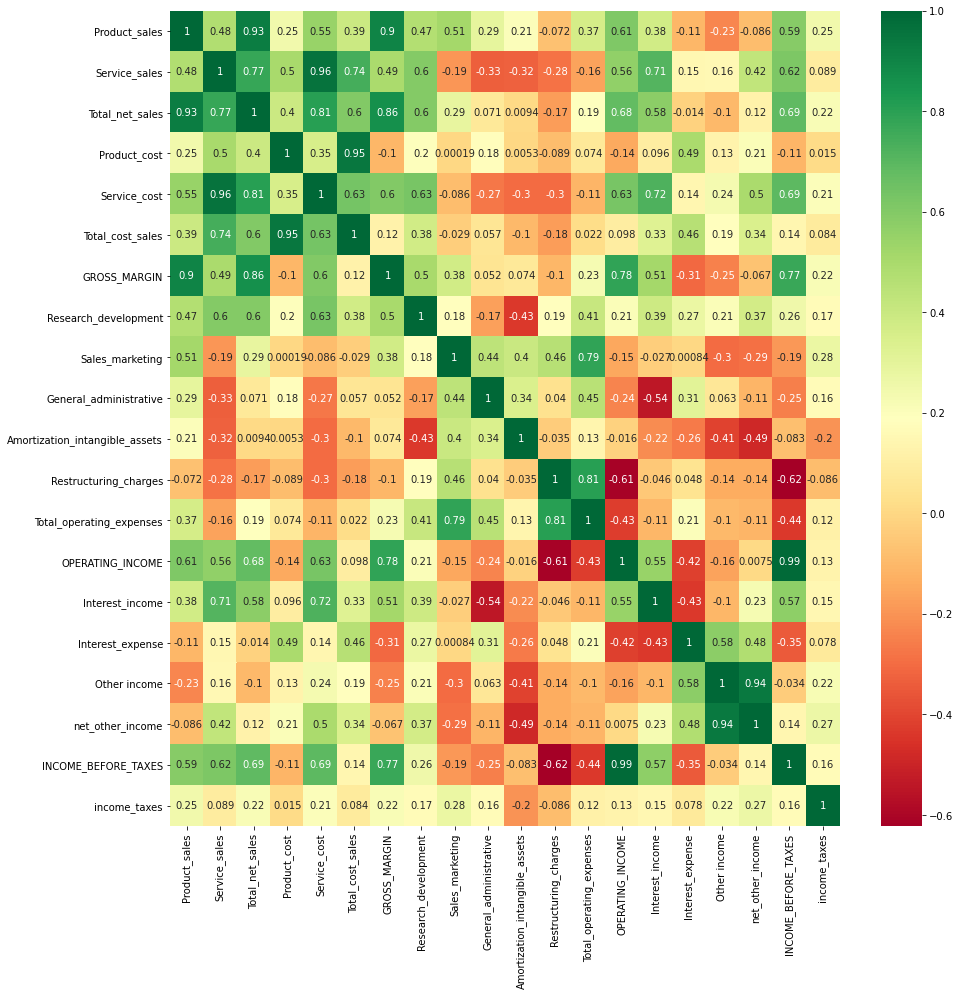

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(correlation,cmap="RdYlGn",annot=True)
plt.show()

<Figure size 1080x1080 with 0 Axes>

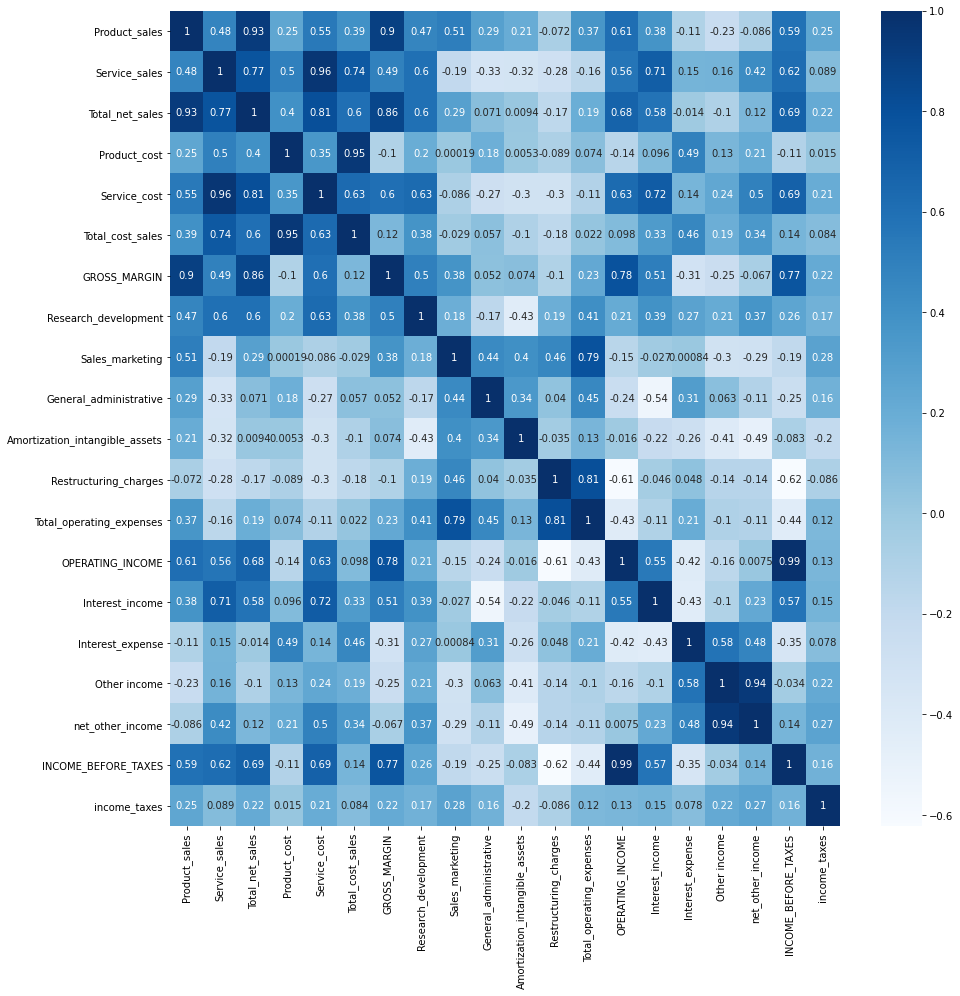

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation,cmap="Blues",annot=True)
plt.show()

In [ ]:
#FIT PCA MODEL,THE NUMBER OF COMPONENTS WILL BE SAME AS NUMBER OF VARIABLES
from sklearn.decomposition import PCA
pca=PCA().fit(x_scaled)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
str(pca.explained_variance_ratio_.sum())

'1.0'

In [ ]:
str(pca.explained_variance_ratio_)

'[3.37583977e-01 1.86812185e-01 1.77224421e-01 9.63058370e-02\n 8.13828427e-02 4.24887073e-02 3.23458586e-02 1.84630732e-02\n 1.04520894e-02 8.41713978e-03 6.95730181e-03 1.25651353e-03\n 3.10054644e-04 2.24692239e-33 1.48132193e-33 5.59623418e-34\n 2.31427670e-34 1.31043364e-34 1.55769855e-35]'

In [ ]:
pca=PCA(5).fit(x_scaled)

In [ ]:
str(pca.explained_variance_ratio_.sum())

'0.8793092617660156'

In [ ]:
str(pca.explained_variance_ratio_)

'[0.33758398 0.18681218 0.17722442 0.09630584 0.08138284]'

In [ ]:
pca.explained_variance_

array([7.12677284, 3.94381279, 3.74140444, 2.03312323, 1.71808224])

Here we will do PCA Modelling for 5 variables such that these variables are not inter coorelated to solve multi collinearity issues and here we can see that if we choose 5 variables for building PCA models,the 87.9% variance in the output variables gets explained by these 5 variables.

In [ ]:
pca_df=pd.DataFrame(pca.components_,columns=x.columns)
pca_df

,Product_sales,Service_sales,Total_net_sales,Product_cost,Service_cost,Total_cost_sales,GROSS_MARGIN,Research_development,Sales_marketing,General_administrative,Amortization_intangible_assets,Restructuring_charges,Total_operating_expenses,OPERATING_INCOME,Interest_income,Interest_expense,Other income,net_other_income,INCOME_BEFORE_TAXES,income_taxes
0,-0.284540,-0.348598,-0.354554,-0.124331,-0.362444,-0.226808,-0.298302,-0.238663,-0.001493,0.077706,0.082649,0.135270,0.035357,-0.299774,-0.280622,0.013375,-0.030170,-0.130398,-0.314414,-0.098065
1,-0.272433,0.144532,-0.134651,0.184465,0.113979,0.191410,-0.288034,0.058439,-0.328850,-0.124106,-0.303404,-0.110830,-0.200255,-0.140298,-0.030431,0.317938,0.405105,0.394451,-0.085229,0.008957
2,-0.171744,-0.015944,-0.130730,-0.265817,-0.021038,-0.226791,-0.019851,-0.223137,-0.339771,-0.294898,-0.023482,-0.302212,-0.451197,0.268669,0.109834,-0.323335,-0.097748,-0.083930,0.254492,-0.111406
3,-0.102515,-0.024689,-0.084530,-0.402755,0.039176,-0.319296,0.095868,0.319930,0.070771,-0.325779,-0.378017,0.403096,0.231772,-0.058378,0.241446,-0.142566,0.097144,0.163170,-0.035595,0.122043
4,-0.108299,0.205941,0.010058,0.297778,0.046783,0.262008,-0.152450,0.055508,-0.096519,-0.382546,0.013289,0.265344,0.026117,-0.158324,0.266227,-0.117537,-0.363991,-0.247429,-0.190330,-0.439671


In [ ]:
x_scaled.shape

(19, 20)

In [ ]:
#transformed features,instead of having 20,we have 5 now.this can now be plugged into any further modelling work
x_scaled_transf=pca.fit_transform(x_scaled)

In [ ]:
x_scaled_transf=pd.DataFrame(x_scaled_transf,columns=('P1','P2','P3','P4','P5'))
x_scaled_transf.head()
x_scaled_transf.shape

,P1,P2,P3,P4,P5
0,4.301926,-0.570940,1.763145,0.625888,-0.646241
1,5.162583,-1.808774,-3.163745,2.604626,1.473216
2,3.338616,-0.705614,0.165750,0.278691,-0.781657
3,1.763910,-0.651621,1.912279,-0.923775,-1.103698
4,1.344619,-0.694956,1.695490,-0.582963,-1.599737


(19, 5)

In [ ]:
correlation=x_scaled_transf.corr()
correlation

,P1,P2,P3,P4,P5
P1,1.000000e+00,-4.653644e-17,0.000000e+00,2.592563e-17,9.870913e-17
P2,-4.653644e-17,1.000000e+00,-3.082929e-16,-1.481176e-16,6.160713e-17
P3,0.000000e+00,-3.082929e-16,1.000000e+00,3.578150e-17,-3.503168e-16
P4,2.592563e-17,-1.481176e-16,3.578150e-17,1.000000e+00,5.280243e-16
P5,9.870913e-17,6.160713e-17,-3.503168e-16,5.280243e-16,1.000000e+00


<Figure size 1080x1080 with 0 Axes>

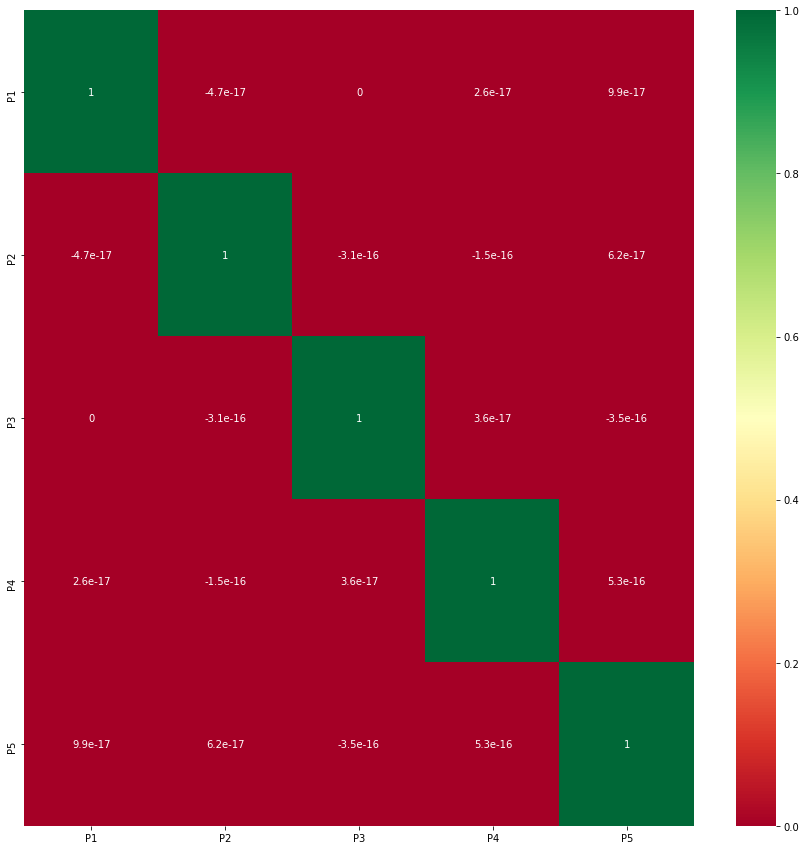

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation,cmap="RdYlGn",annot=True)
plt.show()

<Figure size 1080x1080 with 0 Axes>

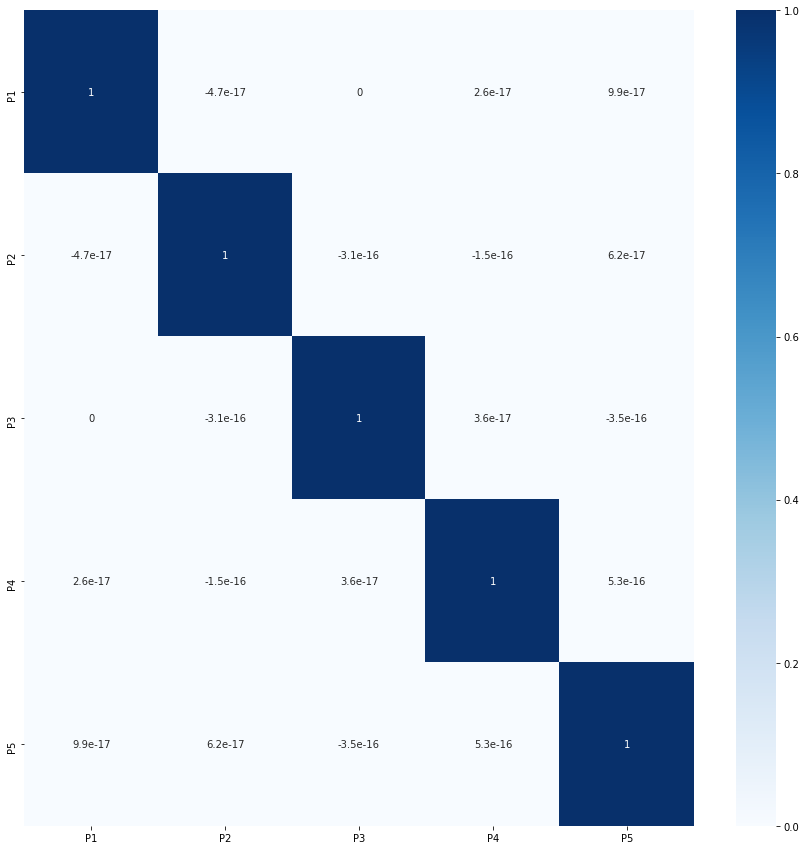

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation,cmap="Blues",annot=True)
plt.show()

In [ ]:
#we will also split our data into train and test datasets and Build the model on train dataset and apply the model on test datset.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from sklearn.model_selection import GridSearchCV
n_estimators=[10,50,100,2000]
criterion=['gini','entropy']
min_samples_split=[2,10,20,40,50]
max_depth=[20,30,40,50,None]
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=3)

In [ ]:
param_grid={'n_estimators':n_estimators,'criterion':criterion,'min_samples_split':min_samples_split,'max_depth':max_depth}
rf=RandomForestClassifier()
rf_g=RandomizedSearchCV(rf,param_grid,cv=kf,verbose=2,n_jobs=1)
rf_g.fit(x_scaled_transf,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=2000, min_samples_split=2, max_depth=50, criterion=gini 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=2000, min_samples_split=2, max_depth=50, criterion=gini, total=   2.5s
[CV] n_estimators=2000, min_samples_split=2, max_depth=50, criterion=gini 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=2, max_depth=50, criterion=gini, total=   2.5s
[CV] n_estimators=2000, min_samples_split=2, max_depth=50, criterion=gini 
[CV]  n_estimators=2000, min_samples_split=2, max_depth=50, criterion=gini, total=   2.5s
[CV] n_estimators=100, min_samples_split=50, max_depth=50, criterion=gini 
[CV]  n_estimators=100, min_samples_split=50, max_depth=50, criterion=gini, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, max_depth=50, criterion=gini 
[CV]  n_estimators=100, min_samples_split=50, max_depth=50, criterion=gini, total=   0.1s
[CV] n_estimators=100, min_samples_split=50, max_depth=50, criterion=gini 
[CV]  n_estimators=100, min_samples_split=50, max_depth=50, criterion=gini, total=   0.2s
[CV] n_estimators=2000, min_samples_split=40, max_depth=40, criterion=gini 
[CV]  n_estimators=2000, min_samples_split=40, max_depth=40, criterion=gini, total=   2.5s
[CV] n_estimators=2000, min_samples_split=40, max_depth=40, criterion=gini 
[CV]  n

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   30.3s finished


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                            

In [ ]:
#PREDICT USING THE TRAINED MODEL
predicted_values=rf_g.predict(x_scaled_transf)
predicted_values

array([1807, 1232, 1777, 2182, 2165, 1917, 2092, 3143, 2478, 1996, 1429,
       2181, 2247, 1828, 2397, 2437, 2319, 2430, 3147])

In [ ]:
#ACCUIRACY SCORE
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(y,predicted_values))

ACCUIRACY SCORE
1.0


Building RandomizedSearchCV Models on these 5 variables we get the Predicted values For Net income.using the predicted values for net income we will try predicting the net income for the next 2 quarters and related confidence level.

In [ ]:
rf_g.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
df=net_income1[['datestamp','NET_INCOME']]
df['Predicted']=np.round(predicted_values,1)
df.tail()

,datestamp,NET_INCOME,Predicted
21,2015-01-24,2397,2397
22,2015-04-25,2437,2437
23,2015-07-25,2319,2319
24,2015-10-24,2430,2430
25,2016-01-23,3147,3147


In [ ]:
#IMPORT PACKAGES
from fbprophet import Prophet
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import itertools
import scipy
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pyramid as pm
from sklearn import metrics
from pyramid.arima import auto_arima

In [ ]:
#pip install pyramid-arima

In [ ]:
NET_INCOME=df.loc[:,['Predicted','datestamp']]
NET_INCOME.set_index('datestamp',inplace=True)
NET_INCOME.head()
from pyramid.arima.stationarity import ADFTest
adf_test=ADFTest(alpha=0.05)
adf_test.is_stationary(NET_INCOME)
'''here alpha=0.05 means that there is 5% probablity that we may make an erroneous decision
 or we are 95% confident that we are correct'''

,Predicted
datestamp,
2011-04-30,1807
2011-07-30,1232
2011-10-29,1777
2012-01-28,2182
2012-04-28,2165


(0.5898406296616913, False)

'here alpha=0.05 means that there is 5% probablity that we may make an erroneous decision\n or we are 95% confident that we are correct'

In [ ]:
train,test=NET_INCOME[:13],NET_INCOME[13:]
train.shape
test.shape
test.head()

(13, 1)

(6, 1)

,Predicted
datestamp,
2014-10-25,1828
2015-01-24,2397
2015-04-25,2437
2015-07-25,2319
2015-10-24,2430


In [ ]:
#fitting a stepwise model:
from pyramid.arima import auto_arima
Arima_model=auto_arima(train,start_p=0,start_q=0,max_p=16,max_q=16,start_P=0,start_Q=0,max_P=12,max_Q=16,
                       m=4,seasonal=True,trace=True,error_action='warn',suppress_warnings=False,stepwise=True,n_fits=3000)
'''here P,D,Q are seasonal components and p,d,q are components for arima modeeling for current year i.e. if p=0,q=0 our ARIMA model becomes 
auto regressive model only.when p=1 then y(t)=f(y(t-1)).when p=2,y(t)=f(y(t-1))+f(y(t-2)) and so on.
WHEN AR is there only then it is autoregressive only i.e. pth term,when it is ARI,
then model depends on p and q both where q is differencing terms and t is error terms.
when all p,d,q is there then it is ARIMA Modelling.small p,d,q signifies current year performance.P,D,Q signifies ARIMA model depends on 
 what happenened in previous year i.e. seasonal_order.random_state=20 and n_fits=30 
 i.e. build maximum 30 models i.e. we are doing randomized search instead of grid search'''

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 4); AIC=199.942, BIC=201.072, Fit time=0.077 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 4); AIC=200.627, BIC=202.887, Fit time=0.130 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 0, 4); AIC=201.919, BIC=203.614, Fit time=0.087 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 1, 4); AIC=201.446, BIC=203.141, Fit time=0.058 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 1, 4); AIC=203.467, BIC=205.727, Fit time=0.076 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 4); AIC=200.613, BIC=202.308, Fit time=0.035 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 4); AIC=199.802, BIC=201.497, Fit time=0.069 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 4); AIC=200.767, BIC=203.592, Fit time=0.136 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 0, 0, 4); AIC=208.0

'here P,D,Q are seasonal components and p,d,q are components for arima modeeling for current year i.e. if p=0,q=0 our ARIMA model becomes \nauto regressive model only.when p=1 then y(t)=f(y(t-1)).when p=2,y(t)=f(y(t-1))+f(y(t-2)) and so on.\nWHEN AR is there only then it is autoregressive only i.e. pth term,when it is ARI,\nthen model depends on p and q both where q is differencing terms and t is error terms.\nwhen all p,d,q is there then it is ARIMA Modelling.small p,d,q signifies current year performance.P,D,Q signifies ARIMA model depends on \n what happenened in previous year i.e. seasonal_order.random_state=20 and n_fits=30 \n i.e. build maximum 30 models i.e. we are doing randomized search instead of grid search'

In [ ]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   13
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -96.901
Date:                Sun, 04 Oct 2020   AIC                            199.802
Time:                        07:03:16   BIC                            201.497
Sample:                             0   HQIC                           199.454
                                 - 13                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2052.2181    179.244     11.449      0.000    1700.906    2403.530
ma.L1          0.4148      0.583      0.711      0.477      -0.728       1.558
sigma2       1.72e+05   6.89e+04      2.498      0.012    3.71e+04    3.07e+05
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 1.70
Prob(Q):                               nan   Prob(JB):                         0.43
Heteroskedasticity (H):               0.86   Skew:                             0.64
Prob(H) (two-sided):                  0.89   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=6),index=test.index)

In [ ]:
prediction

,0
datestamp,
2014-10-25,2067.939438
2015-01-24,2052.218057
2015-04-25,2052.218057
2015-07-25,2052.218057
2015-10-24,2052.218057
2016-01-23,2052.218057


<Figure size 1080x720 with 0 Axes>

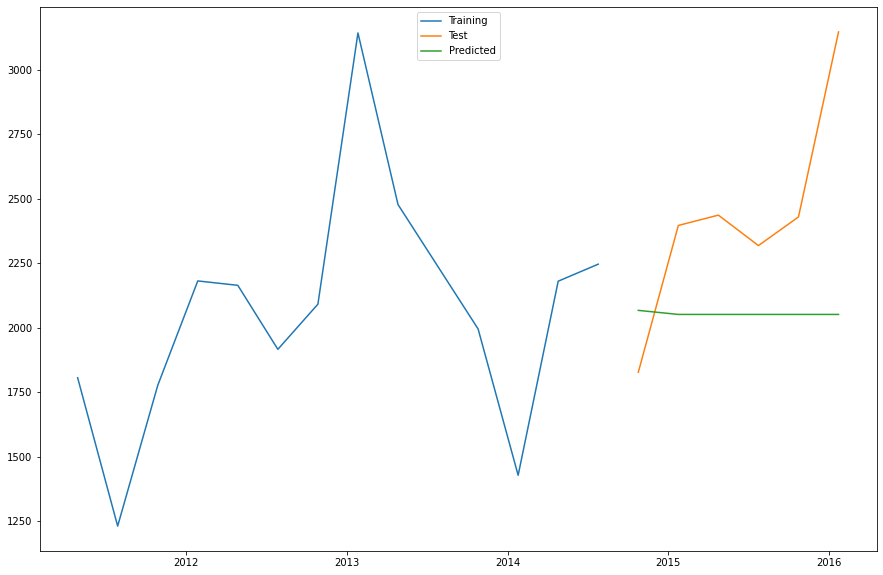

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction,label='Predicted')
plt.legend(loc='upper center')
plt.show()

In [ ]:
metrics.mean_absolute_error(test.Predicted,prediction)

451.4748586640881

Building Arima_model using Auto Arima we got error as 451.47 which is quite high.here we tried predicting net income for atleast 2 quarters ahead.

In [ ]:
df1=df.loc[:,('datestamp','Predicted')]
df1.rename(columns={'datestamp':'ds'}, inplace=True)
df1.head()

,ds,Predicted
6,2011-04-30,1807
7,2011-07-30,1232
8,2011-10-29,1777
9,2012-01-28,2182
10,2012-04-28,2165


In [ ]:
#RENAME THE COLUMNS AS REQUIRED BY THE PACKAGE.FIRST BUILD THE FORECASTING MODEL 
#WITHOUT DOING ANY TRANSFORMATION OF THE VARIABLE AND CHECK ACCURACY OF THE FORECAST
df1=df1.rename(columns={"Predicted":"y"})

In [ ]:
df1=df1.sort_index(axis=1)
df1.tail(5)


,ds,y
21,2015-01-24,2397
22,2015-04-25,2437
23,2015-07-25,2319
24,2015-10-24,2430
25,2016-01-23,3147


In [ ]:
#BUILD TIMESERIES MODEL
my_forecast=Prophet(interval_width=0.95)

In [ ]:
my_forecast.fit(df1)
forecast_periods=my_forecast.make_future_dataframe(periods=5,include_history=True,freq='3M')
forecast_periods.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


,ds
19,2016-01-31
20,2016-04-30
21,2016-07-31
22,2016-10-31
23,2017-01-31


In [ ]:
forecast=my_forecast.predict(forecast_periods)
forecast1=forecast.loc[:,['ds','yhat']]
forecast1.tail(5)

,ds,yhat
19,2016-01-31,15805.744048
20,2016-04-30,12667.846277
21,2016-07-31,12622.875566
22,2016-10-31,16052.305730
23,2017-01-31,18935.782147


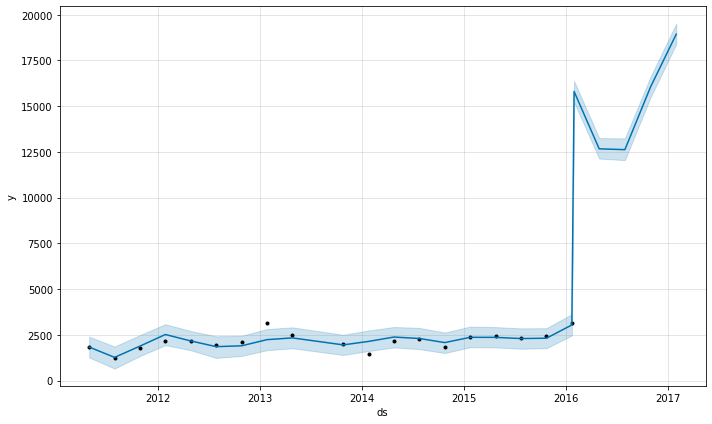

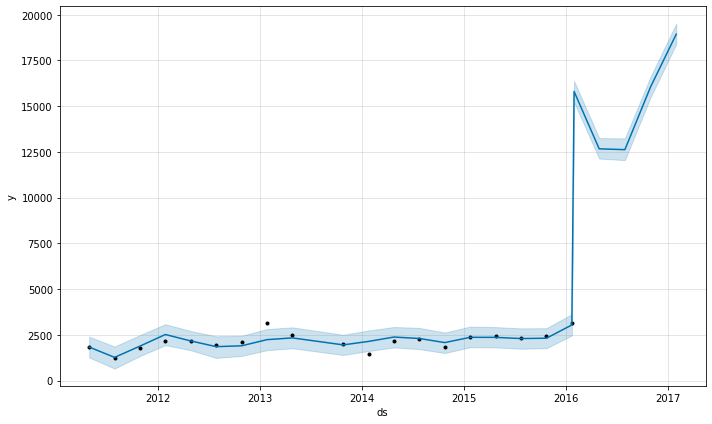

In [ ]:
my_forecast.plot(forecast,uncertainty=True)

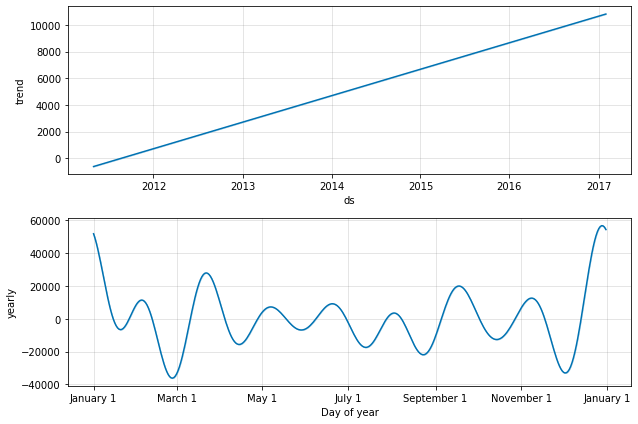

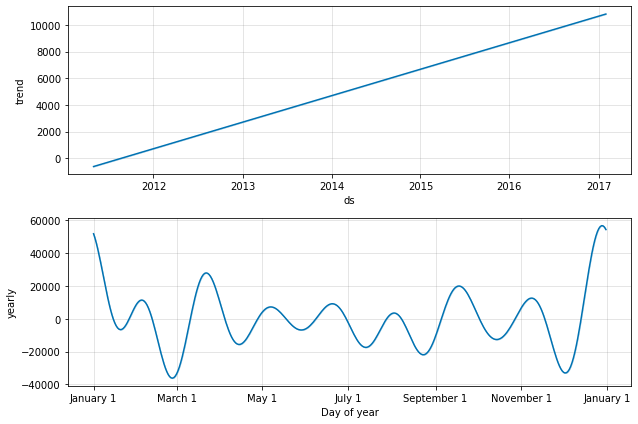

In [ ]:
my_forecast.plot_components(forecast)

In [ ]:
final_df=pd.merge(forecast1,df1,on='ds',how='inner')
final_df.head(5)

,ds,yhat,y
0,2011-04-30,1830.783238,1807
1,2011-07-30,1267.375389,1232
2,2011-10-29,1883.402479,1777
3,2012-01-28,2517.165977,2182
4,2012-04-28,2165.081035,2165


In [ ]:
#COMPLETE ACCURACY OF THE FORECAST
import numpy as np
from sklearn import metrics
np.round(metrics.mean_absolute_error(final_df.yhat,final_df.y),2)

179.85

Building Facebook Prophet Model  we got error as 179.85 which is quite an improvement considering previous error of 451.47 obtained by building the ARIMA model.Here we tried predicting net income for atleast 2 quarters ahead.

In [ ]:
#LOG TRANSFORMATION
df1.y=np.log(df1.y)
df1.head(5)

,ds,y
6,2011-04-30,7.499423
7,2011-07-30,7.116394
8,2011-10-29,7.482682
9,2012-01-28,7.687997
10,2012-04-28,7.680176


In [ ]:
#BUILD TIMESERIES MODEL
my_forecast=Prophet(interval_width=0.95)
my_forecast.fit(df1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


In [ ]:
forecast_periods=my_forecast.make_future_dataframe(periods=5,include_history=True,freq='M')
forecast_periods.tail()

,ds
19,2016-01-31
20,2016-02-29
21,2016-03-31
22,2016-04-30
23,2016-05-31


In [ ]:
forecast=my_forecast.predict(forecast_periods)
forecast1=forecast.loc[:,['ds','yhat']]
forecast1.head(5)

,ds,yhat
0,2011-04-30,7.490605
1,2011-07-30,7.115985
2,2011-10-29,7.491083
3,2012-01-28,7.761742
4,2012-04-28,7.717532


In [ ]:
final_df1=pd.merge(forecast1,df1,on='ds',how='inner')
final_df1.head(5)

,ds,yhat,y
0,2011-04-30,7.490605,7.499423
1,2011-07-30,7.115985,7.116394
2,2011-10-29,7.491083,7.482682
3,2012-01-28,7.761742,7.687997
4,2012-04-28,7.717532,7.680176


In [ ]:
#CONVERT 'Y' back to original scale
final_df1.yhat=np.e**(final_df1.yhat)
final_df1.y=np.e**(final_df1.y)
final_df1.head(5)

,ds,yhat,y
0,2011-04-30,1791.134986,1807.0
1,2011-07-30,1231.496086,1232.0
2,2011-10-29,1791.992066,1777.0
3,2012-01-28,2348.993445,2182.0
4,2012-04-28,2247.406055,2165.0


In [ ]:
#compute accuracy of the forecast
import numpy as np
from sklearn import metrics
np.round(metrics.mean_absolute_error(final_df1.yhat,final_df1.y),0)

137.0

In [ ]:
#   GENERATE FORECAST VALUES FOR THE NEXT 12 MONTHS ALONG WITH THE 
# 95% CONFIDENCE INTERVAL
forecast2=forecast.loc[12:,['ds','yhat','yhat_lower','yhat_upper']]
forecast2.yhat=np.e**(forecast2.yhat)
forecast2.yhat_lower=np.e**(forecast2.yhat_lower)
forecast2.yhat_upper=np.e**(forecast2.yhat_upper)
np.round(forecast2,0).head()

,ds,yhat,yhat_lower,yhat_upper
12,2014-07-26,2242.0,1778.0,2793.0
13,2014-10-25,1898.0,1509.0,2344.0
14,2015-01-24,1969.0,1624.0,2439.0
15,2015-04-25,2410.0,1916.0,2972.0
16,2015-07-25,2323.0,1850.0,2924.0


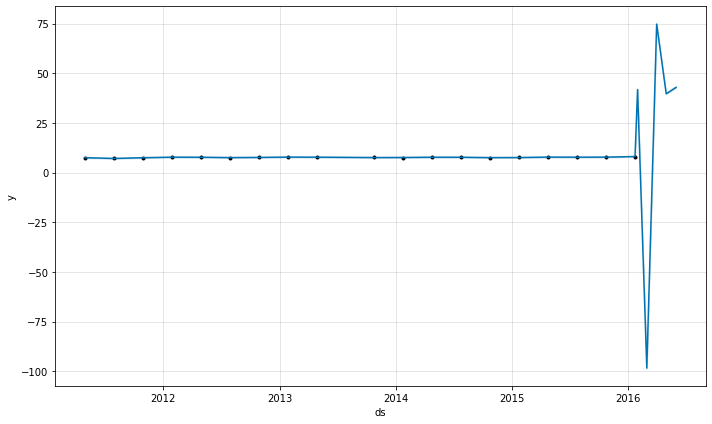

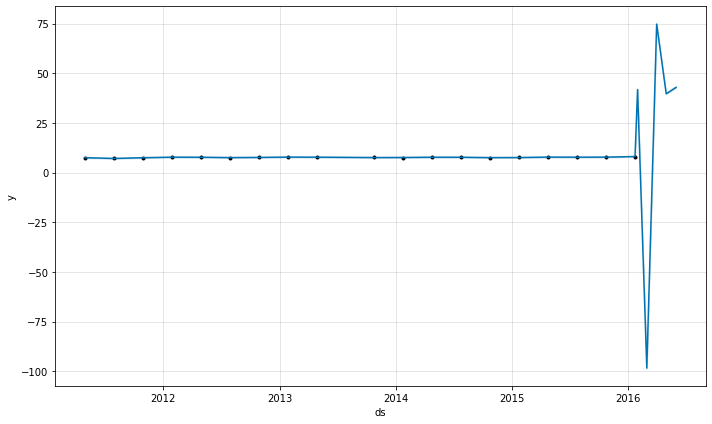

In [ ]:
my_forecast.plot(forecast,uncertainty=True)


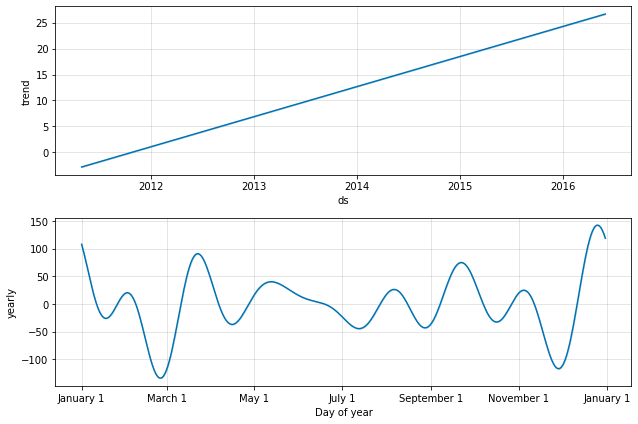

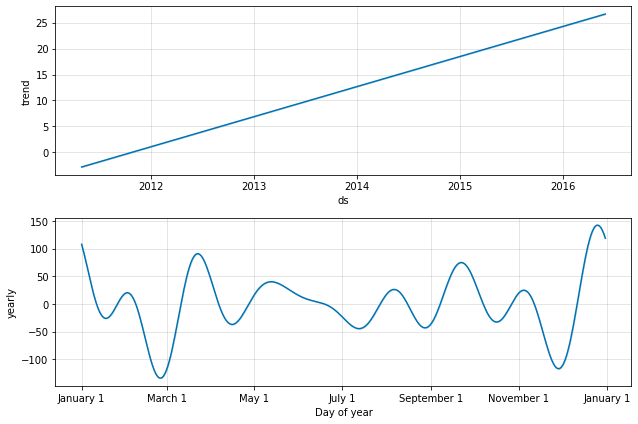

In [ ]:
my_forecast.plot_components(forecast)

Building Facebook Prophet Model by taking logs  we got error as 137 which is still quite an improvement considering previous error of 179.85 obtained by building the facebook prophet model without using logs.Here we tried predicting net income for atleast 2 quarters ahead.we can see from the overall graph for net income that with the data available the error obtained while predicting a time series model for Net income remains quite high using any of the above methods.hence,going forward we can say that the Models does not seem to give very conclusive prediction inspite of the fact that the trend is on an increasing path and in an self correcting mode ever since the time when NET INCOME GRAPH had hit the lowest bottom in 2014.

In [ ]:
!jupyter nbconvert regression_cisco_dataset.ipynb

[NbConvertApp] Converting notebook regression_cisco_dataset.ipynb to html
[NbConvertApp] Writing 1525000 bytes to regression_cisco_dataset.html
